<a href="https://colab.research.google.com/github/kteymouri/intro-ml-course-winter2025/blob/main/Datathon_2_Allfeatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will start by import all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
import io

uploaded = files.upload()
# Read the dataset into a Pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded['HFM.csv']))

# Display the first few rows of the dataset to ensure it's loaded correctly
df.head()

Saving HFM.csv to HFM.csv


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,hypertension,platelets,serum_creatinine,serum_sodium,sex,smoking,time,hf_mortality
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Before getting into the model, we will look at the description of data to better understand it.

In [3]:
description = df.describe()
print (description)

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  hypertension      platelets  serum_creatinine  \
count         299.000000    299.000000     299.000000         299.00000   
mean           38.083612      0.351171  263358.029264           1.39388   
std            11.834841      0.478136   97804.236869           1.03451   
min            14.000000      0.000000   25100.000000       

Based on the minimum values, we could not identify any missing values. Thus, to make sure that there are no missing values. We will perform the follwoing function.

In [4]:
for col in df.columns:
    print(f"{col}:", df[col].unique())

age: [75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.
 60.667 73.    77.    78.    54.    47.    56.   ]
anaemia: [0 1]
creatinine_phosphokinase: [ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  200  248
  270 1808 1082  719  193 4540  646  281 1548  805  291  482  943  185
  132 1610 2261  233   30 1846  335   58  910   72  130 2334 24

In [9]:
# Checking for missing values, in case there are any NA values, in this case there are none
print(df.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
hypertension                0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
hf_mortality                0
dtype: int64


We see that there are no missing values so we can go on.
We will plot the description of our data for better visualization. To do this we will first drop the binary values: The outcome, Smoking, Sex, hypertension, diabetes and anemia.


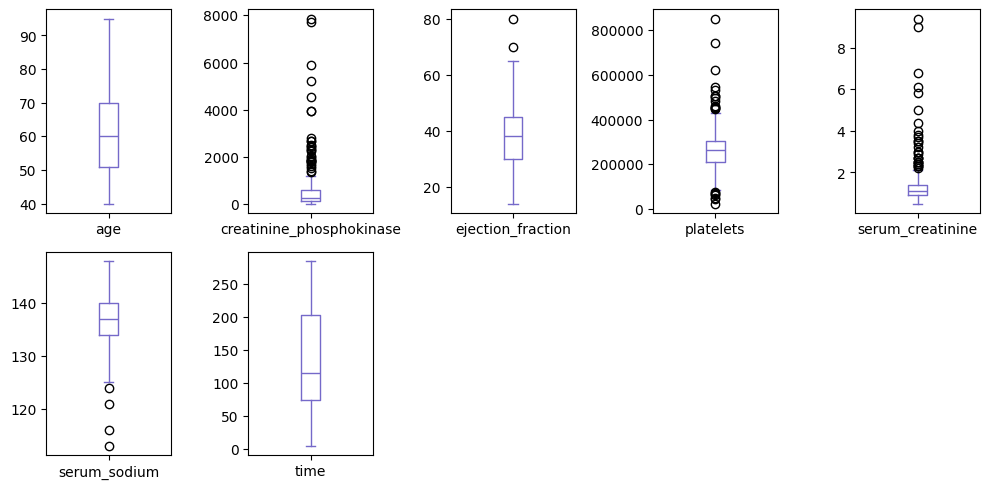

In [8]:
variables_drop = ['hf_mortality', 'smoking', 'sex' , 'hypertension', 'anaemia', 'diabetes']
description = df.drop(variables_drop, axis=1)

# Visual representation of df.describe()
description.plot(kind='box', subplots=True, layout=(2, 5), figsize=(10, 5), color='#7569c9')
plt.tight_layout()
plt.show()

Now we will create a pairplot

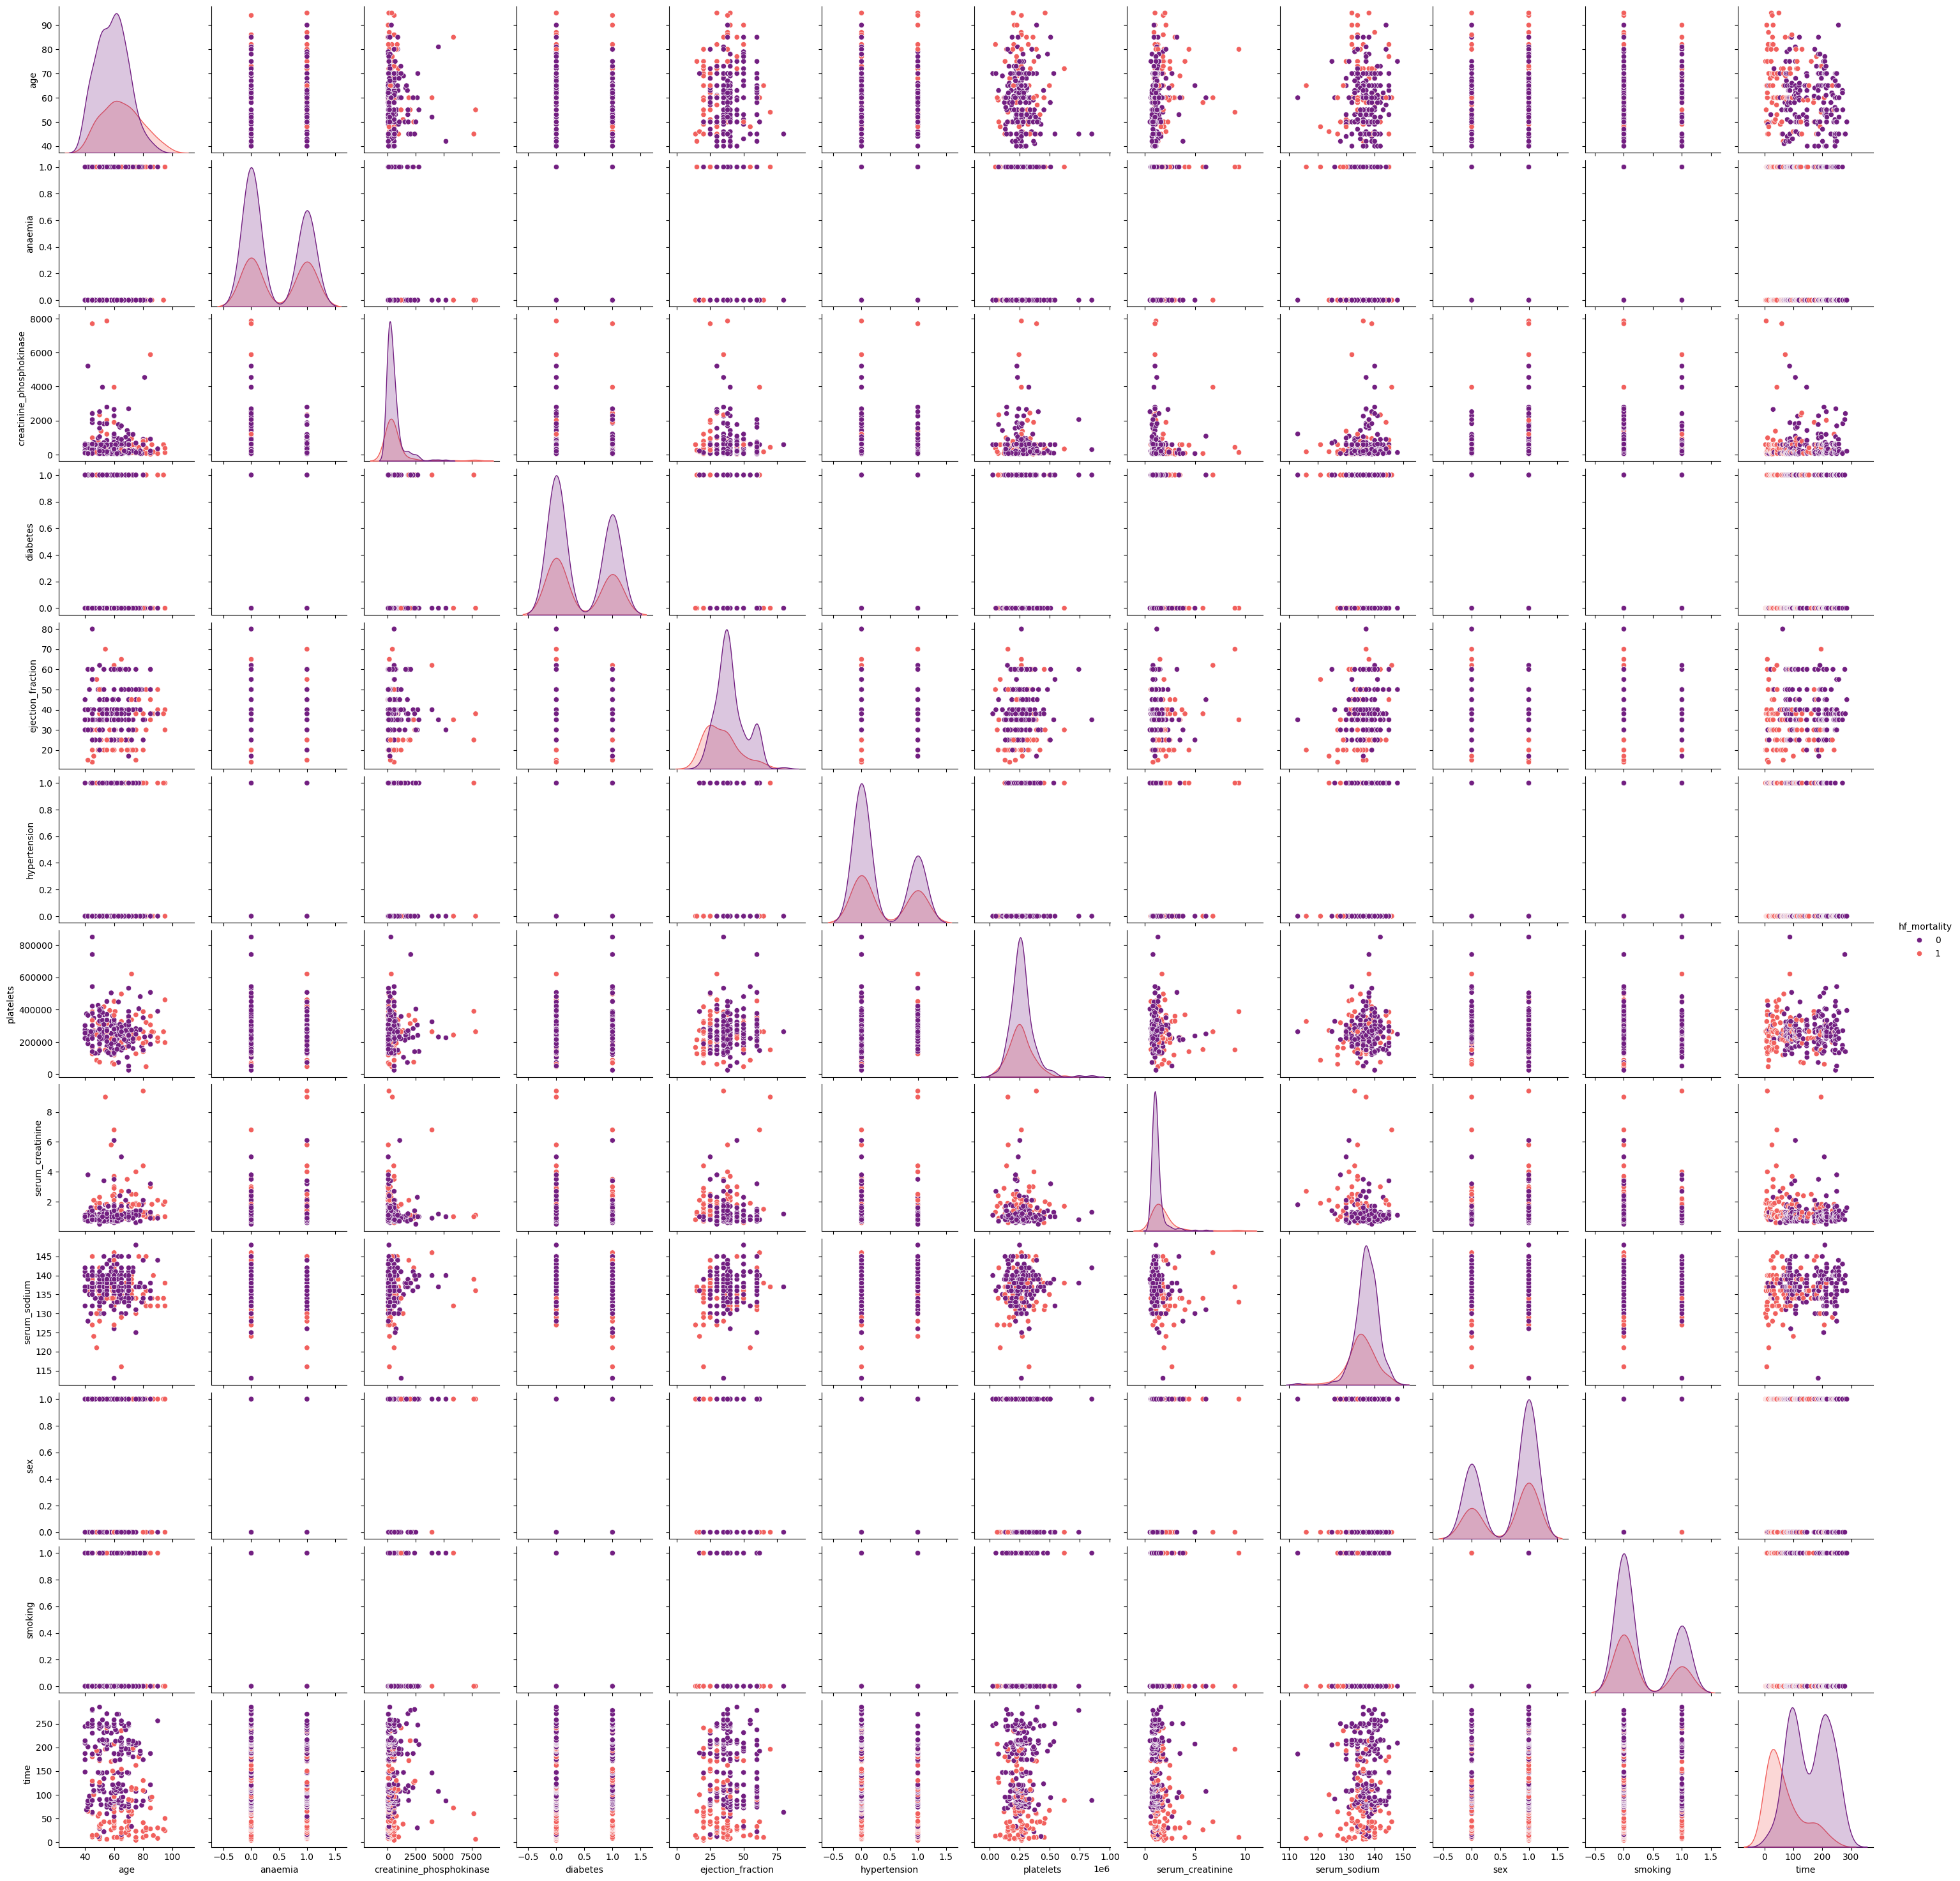

In [11]:
# Display pair plot for data visualization
sns.pairplot(df, hue='hf_mortality', palette="magma")
plt.show()

Preparing the data for the Logistic Regression Model

In [22]:
#Splitting Data to features (X) and Outcome
X = df.drop('hf_mortality', axis = 1)
y = df['hf_mortality']

#Splitting the data into test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Normalizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform on the training set
X_test = scaler.transform(X_test)        # transform the test set

The Logistic Regression Model using L2 (Ridge) recularization:

In [23]:
# Training logistic regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

# The penalty parameter is used to specify the norm used in the penalization: l1 or l2 regularization.
# The C parameter represents inverse of regularization strength, smaller values specify stronger regularization.
# The solver parameter specifies the algorithm to use in the optimization problem.

LogisticRegression(solver='liblinear')

Now we will evaluate the logistic regression model:

In [24]:
# Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[34  1]
 [10 15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.97      0.86        35
           1       0.94      0.60      0.73        25

    accuracy                           0.82        60
   macro avg       0.86      0.79      0.80        60
weighted avg       0.84      0.82      0.81        60



Visualizing the results

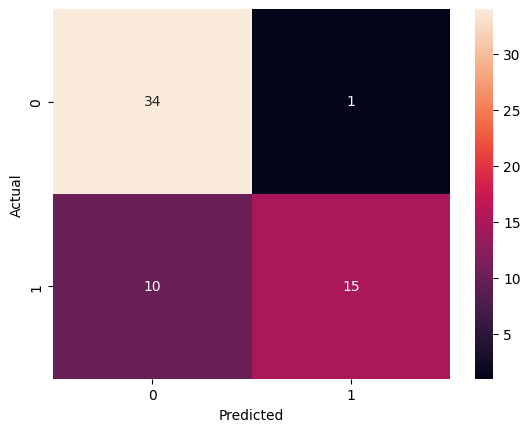

In [25]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

We would like to repeat this with L1 (Lasso) regularization as well.

In [19]:
#Splitting Data to features (X) and Outcome
X1 = df.drop('hf_mortality', axis = 1)
y1 = df['hf_mortality']

#Splitting the data into test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

#Normalizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform on the training set
X_test = scaler.transform(X_test)        # transform the test set

In [20]:
# Training logistic regression model
log_reg2 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')
log_reg2.fit(X_train, y_train)

# The penalty parameter is used to specify the norm used in the penalization: l1 or l2 regularization.
# The C parameter represents inverse of regularization strength, smaller values specify stronger regularization.
# The solver parameter specifies the algorithm to use in the optimization problem.

LogisticRegression(penalty='l1', solver='liblinear')

In [21]:
# Use the model to make predictions on the testing data
y_pred2 = log_reg2.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[34  1]
 [10 15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.97      0.86        35
           1       0.94      0.60      0.73        25

    accuracy                           0.82        60
   macro avg       0.86      0.79      0.80        60
weighted avg       0.84      0.82      0.81        60



The L1 and L2 regularization had the same results.
Now we will visualize based on the first (L2) regularization.

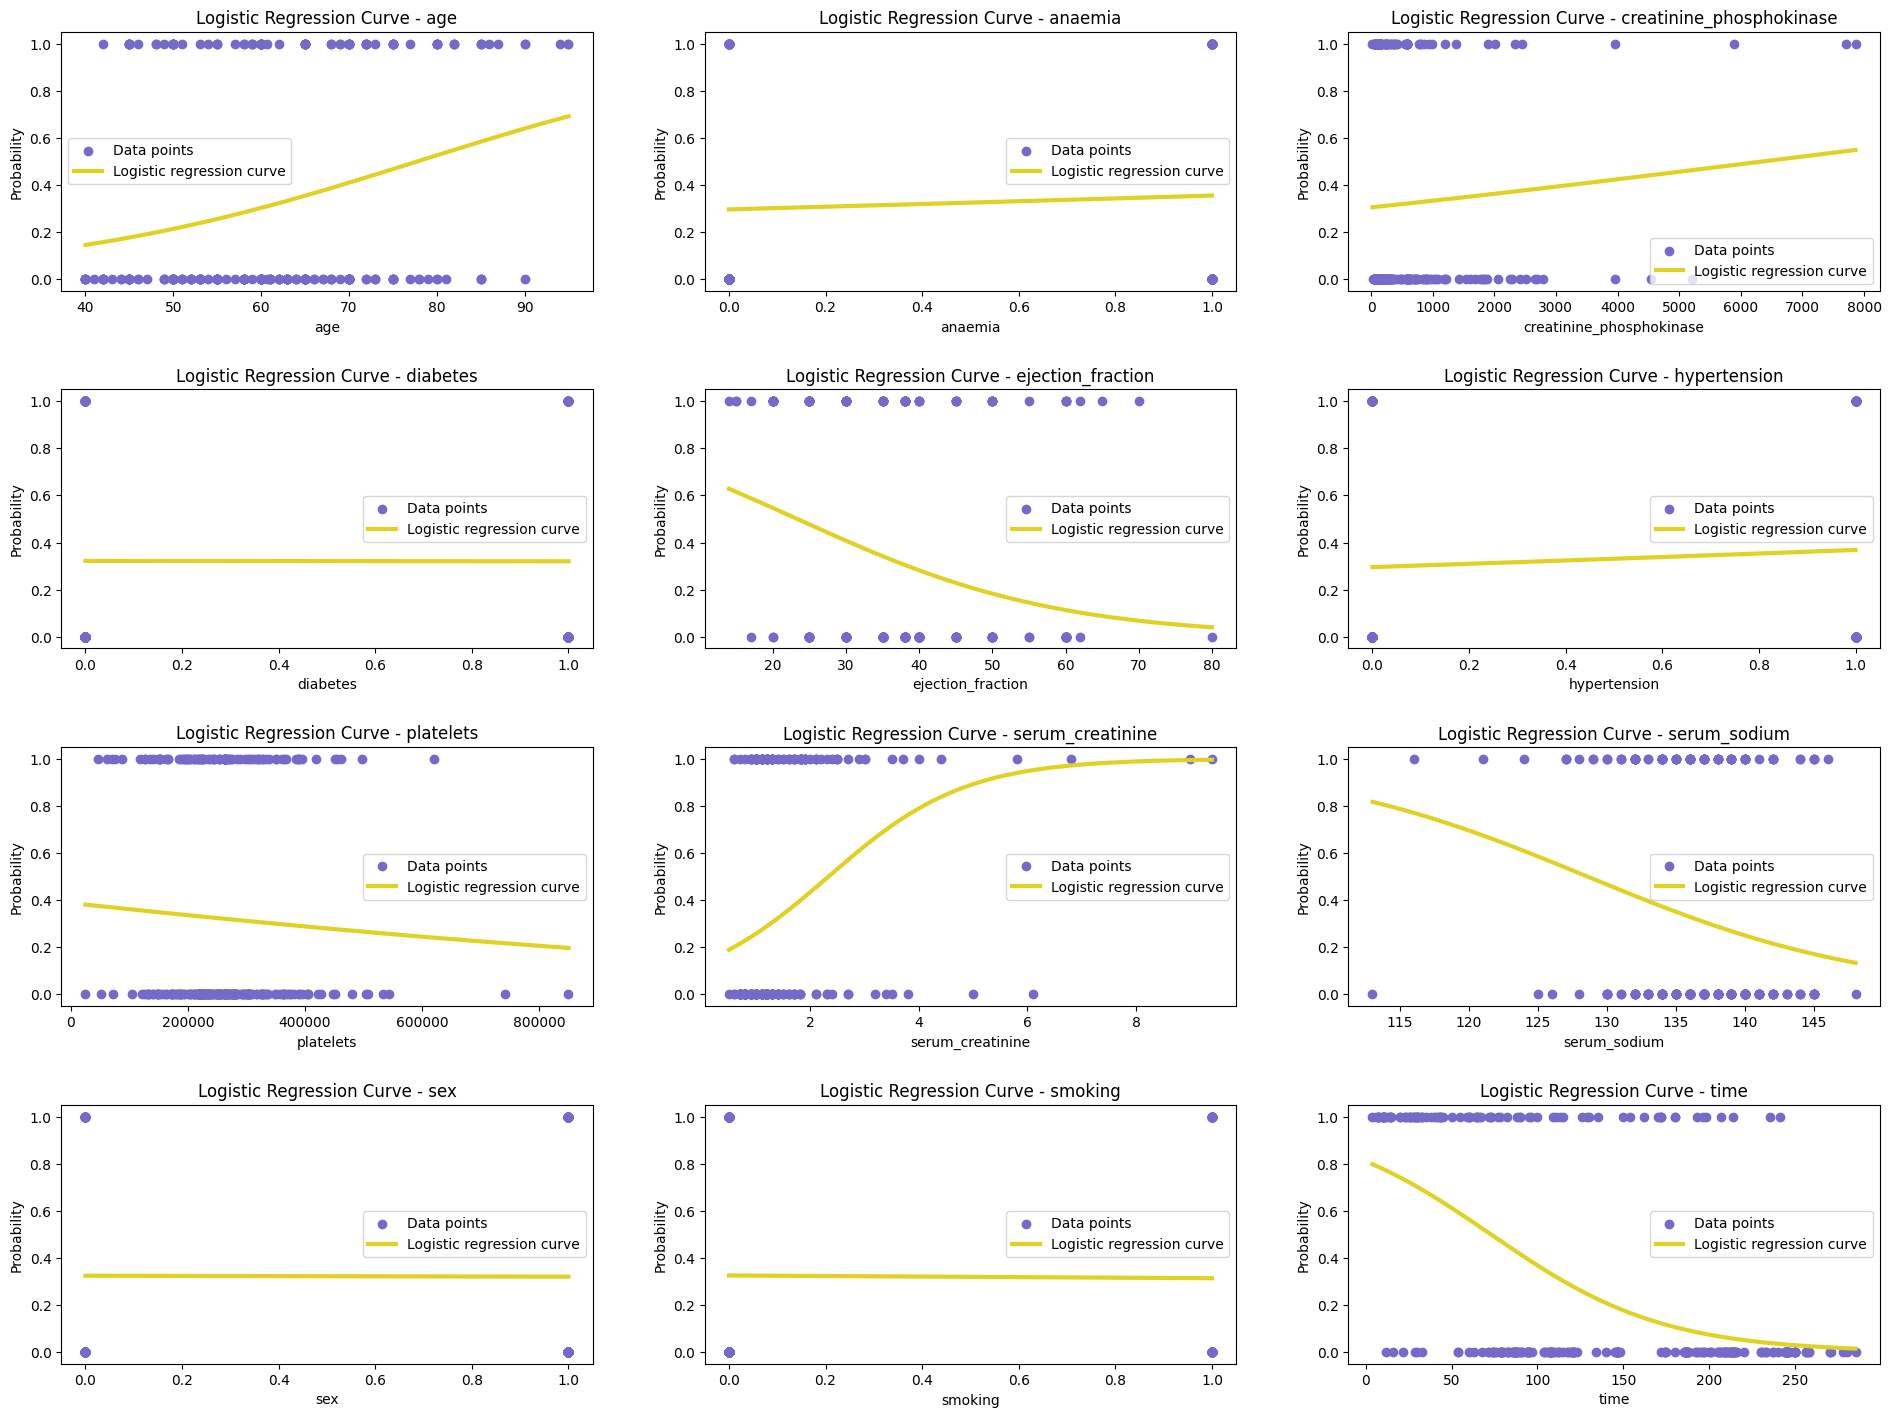

In [29]:
# Create logistic regression object
log_reg = LogisticRegression()

fig, axs = plt.subplots(4, 3, figsize=(20, 15))
fig.tight_layout(pad=5.0)  # Adds padding between subplots

for i, feature in enumerate(df.columns[:-1]):  # Exclude 'Outcome' column
    row = i // 3  # Determine row index
    col = i % 3   # Determine column index

    # Reshape the feature and outcome arrays to fit the model
    X = df[[feature]]
    y = df['hf_mortality']

    # Fit logistic regression model
    log_reg.fit(X, y)

    # Get min and max values of the feature for plotting
    x_test = np.linspace(X.min(), X.max(), 300)

    # Get the probability for each value in the range
    prob = log_reg.predict_proba(x_test)[:, 1]
     # Plot the data points
    axs[row, col].scatter(X, y, color='#7569c9', label='Data points')

    # Plot the sigmoid curve
    axs[row, col].plot(x_test, prob, color='#e0d122', lw=3, label='Logistic regression curve' )

    axs[row, col].set_title(f'Logistic Regression Curve - {feature}')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Probability')
    axs[row, col].legend()

Now we will print the summary of the regression model

In [30]:
import statsmodels.api as sm

# Separate features and target variable
X = df.drop('hf_mortality', axis=1)
y = df['hf_mortality']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Get summary report
summary = log_reg.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.367147
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           hf_mortality   No. Observations:                  299
Model:                          Logit   Df Residuals:                      286
Method:                           MLE   Df Model:                           12
Date:                Wed, 29 Jan 2025   Pseudo R-squ.:                  0.4151
Time:                        16:01:21   Log-Likelihood:                -109.78
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 3.771e-27
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       10.1849      5.657      1.801      0.072      -0.902